<a href="https://colab.research.google.com/github/ScientistLim/ProjectAW/blob/main/univariate_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(8926, 2)
Axes(0.125,0.11;0.775x0.77)


<Figure size 1000x800 with 0 Axes>

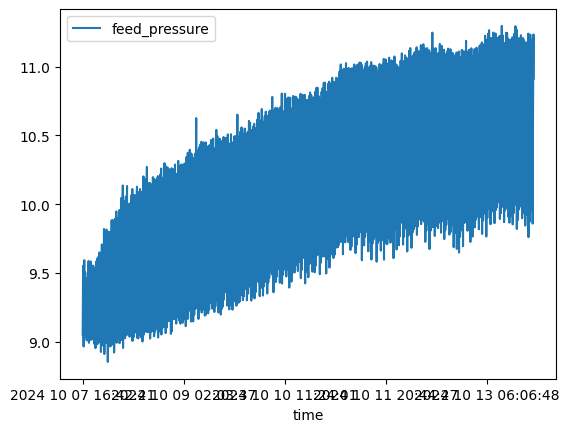

In [3]:
# In Colab
# Ref:  https://medium.com/@soubhikkhankary28/univariate-time-series-forecasting-using-rnn-lstm-32702bd5cf4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading train CSV file
df1 = pd.read_csv("train_data.csv")
print(df1.shape)
plt.figure(figsize=(10,8))
print(df1.plot(x="time", y='feed_pressure'))


In [4]:
# df1.head()
df1=df1[['feed_pressure']]
df1.head()

,feed_pressure
0,9.051750
1,9.131625
2,9.208500
3,9.283125
4,9.371625


In [5]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# feature_range를 튜플로 지정
sc = MinMaxScaler(feature_range=(0, 1))
df1_scaled_train = sc.fit_transform(df1)
print(type(df1_scaled_train))
df1_scaled_train

<class 'numpy.ndarray'>


array([[0.08110599],
       [0.11382488],
       [0.1453149 ],
       ...,
       [0.97465438],
       [0.97465438],
       [0.84285714]])

In [6]:
df1_scaled_train.shape[0]

8926

In [7]:
hops = 60  # 입력 데이터의 길이 설정 (과거 60개의 시점 데이터를 사용)
total_len = df1_scaled_train.shape[0]  # 데이터의 총 길이
X_train = []  # 입력 데이터 리스트
y_train = []  # 출력 데이터 리스트
for i in range(60, total_len):
    # 과거 60개의 데이터 포인트를 입력으로 사용
    X_train.append(df1_scaled_train[i - 60:i])  # i번째 데이터를 기준으로 이전 60개 데이터를 X에 추가
    y_train.append(df1_scaled_train[i])         # i번째 데이터를 y에 추가 (예측할 값)
# 리스트를 numpy 배열로 변환
X_train = np.array(X_train)
y_train = np.array(y_train)

print(len(X_train))
print(len(y_train))

m1_len=X_train.shape[0]
m2_len=X_train.shape[1]

8866
8866


In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - loss: 0.0444
Epoch 2/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - loss: 0.0091
Epoch 3/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - loss: 0.0067
Epoch 4/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - loss: 0.0054
Epoch 5/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 34s 58ms/step - loss: 0.0045
Epoch 6/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 0.0036
Epoch 7/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 0.0033
Epoch 8/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 0.0030
Epoch 9/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - loss: 0.0029
Epoch 10/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - loss: 0.0026


(2232, 2)
       feed_pressure
count    2232.000000
mean       10.758630
std         0.387460
min         9.794625
25%        10.441031
50%        10.760813
75%        11.084813
max        11.473500
Axes(0.125,0.11;0.775x0.77)


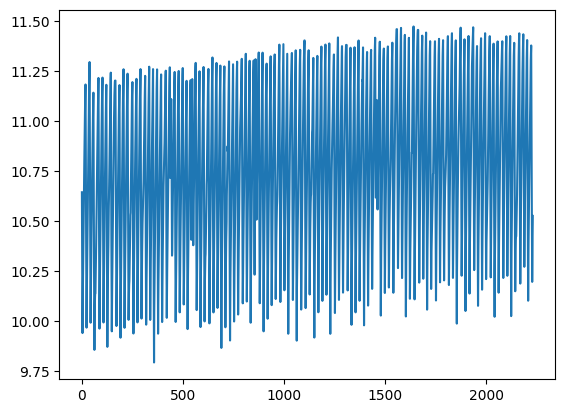

In [10]:
# Reading train CSV file
df1_test=pd.read_csv("test_data.csv")
print(df1_test.shape)
print(df1_test.describe())
print(df1_test['feed_pressure'].plot())

In [11]:
df1_total=pd.concat((df1['feed_pressure'],df1_test['feed_pressure']),axis=0)
df1_new=df1_total.values
test_arr=df1_new[len(df1_new)-len(df1_test)-60:]
# verify if 80 records are present or not
len(test_arr)
test_arr

array([10.185   , 10.297125, 10.3815  , ..., 10.337625, 10.433625,
       10.527   ])

In [12]:
test_arr_1=sc.transform(test_arr.reshape(-1,1))
test_arr_1.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(2292, 1)

In [13]:
n_hops=60
n_features=1
X_test=[]

y_test=[]
for i in range(n_hops,test_arr_1.shape[0]):
    X_test.append(test_arr_1[i-n_hops:i])
X_test=np.array(X_test)

In [14]:
y_test_pred=model.predict(X_test)
print(len(y_test_pred))
y_test_pred

y_test_pred_actual=sc.inverse_transform(y_test_pred)
y_test_pred_actual

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
2232


array([[10.587609],
       [10.286999],
       [10.158904],
       ...,
       [10.226993],
       [10.324532],
       [10.44436 ]], dtype=float32)

In [15]:
test_pred_1=pd.DataFrame(y_test_pred_actual,columns=['actual'])
test_actual_1=df1_test[['time', 'feed_pressure']]
full_test_actual_1=pd.concat([test_pred_1, test_actual_1], axis=1)
full_test_actual_1

,actual,time,feed_pressure
0,10.587609,2024 10 13 21:33:04,10.645125
1,10.286999,2024 10 13 21:34:04,10.391250
2,10.158904,2024 10 13 21:35:04,10.155000
3,10.089773,2024 10 13 21:36:04,9.941625
4,10.014359,2024 10 13 21:37:04,10.076625
...,...,...,...
2227,10.347705,2024 10 15 10:40:31,10.389375
2228,10.297087,2024 10 15 10:41:31,10.197375
2229,10.226993,2024 10 15 10:42:31,10.337625
2230,10.324532,2024 10 15 10:43:31,10.433625


[]

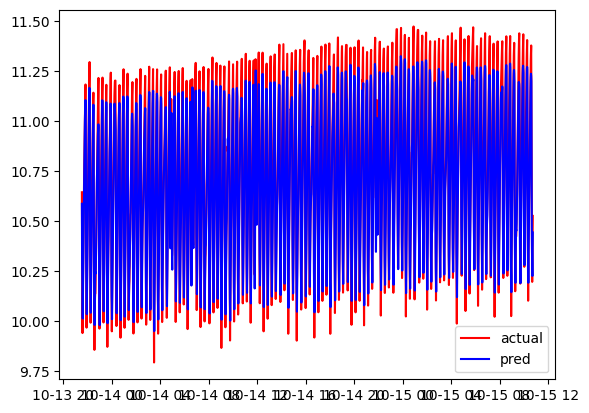

In [16]:
full_test_actual_1.index=pd.to_datetime(full_test_actual_1['time'])
plt.plot(full_test_actual_1['feed_pressure'], color='red', label='actual')
plt.plot(full_test_actual_1['actual'], color='blue', label='pred')
plt.legend()
plt.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr
import numpy as np

# RMSE (Root Mean Squared Error) 계산
rmse = np.sqrt(mean_squared_error(full_test_actual_1['feed_pressure'], full_test_actual_1['actual']))

# R^2 (Coefficient of Determination) 계산
r2 = r2_score(full_test_actual_1['feed_pressure'], full_test_actual_1['actual'])

# MAPE (Mean Absolute Percentage Error) 계산
mape = mean_absolute_percentage_error(full_test_actual_1['feed_pressure'], full_test_actual_1['actual']) * 100

# Mean Bias Deviation (MBD) 계산
mbd = np.mean(full_test_actual_1['actual'] - full_test_actual_1['feed_pressure'])

# Mean Absolute Error of Means (MAEM) 계산
maem = abs(np.mean(full_test_actual_1['actual']) - np.mean(full_test_actual_1['feed_pressure']))

# Pearson Correlation Coefficient (PCC) 계산
pcc, _ = pearsonr(full_test_actual_1['feed_pressure'], full_test_actual_1['actual'])

# 결과 출력
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 (Coefficient of Determination):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
print("Mean Bias Deviation (MBD):", mbd)
print("Mean Absolute Error of Means (MAEM):", maem)
print("Pearson Correlation Coefficient (PCC):", pcc)


Root Mean Squared Error (RMSE): 0.10007252797887185
R^2 (Coefficient of Determination): 0.9332625296352679
Mean Absolute Percentage Error (MAPE): 0.8072242185769034 %
